# Film Genre Trends Over Time #
## by Alexander Kovalev ##

### Cinema through the ages ###
Every decade since the advent of cinema has movies that we associate with it. From The Wizard of Oz and Gone with the Wind in the 30s, to the Clint Eastwood movies of the 60s, Star Wars and The Godfather in the 70s, Back to the Future in the 80s, and so on. Surely, the 2010s will be famous for the Avengers series, among other films. 

But even though we know the most popular movies from varioius decades, do we know the most popular film genres? Did all the most famous movies of each decade all come from one genre? Which genres could charecterise each decade? When did each genre peak? Can we predict what decade a movie was made in based on its genre? These are the types of questions that we will answer in this tutorial. Rather than just look at Top 10 lists, we can use the data science pipeline to find which genres REALLY characterised each decade, and maybe even predict what the next best common will be!

### Imports ###
This cell will contain all the necessary imports for this tutorial.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

### Data Collection ###
The first step of the process will be to find a dataset of movies. Here I will demonstrate two methods of collecting data. Kaggle provides a .csv file of the 5000 highest grossing films, which should be more than enough for our purposes. This data originally comes from TMDb (The Movie Database). This csv file has been downloaded from Kaggle and placed in the same directory as this tutorial. You can take any csv/tsv file and turn it into a dataframe! We will also use The Number's table of top grossing films per year, which we will scrape from their website.

In [2]:
# Store the TMDb data in a dataframe
movie_data = pd.read_csv('tmdb_5000_movies.csv')
movie_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
#Scrape the-numbers.com
get_request = requests.get('https://www.the-numbers.com/movies/#tab=year') #Gets the website
parser = BeautifulSoup(get_request.content, "html.parser") #Parses the html of the site
html_table = str(parser.find("table")) #Finds the table that we're looking for (the top grossing movie per year)
dfs = pd.read_html(html_table) #Puts the table into a list of pandas dataframes
top_movies = dfs[0] #There's only one dataframe in that list, we want that
top_movies.head()

,Year,AnnualStats,TotalMovies,AverageProductionBudget,CombinedWorldwideBox Office,No. 1 Movie
0,TBD,NaN,2108,NaN,NaN,NaN
1,2029,NaN,1,NaN,NaN,NaN
2,2028,NaN,1,NaN,NaN,NaN
3,2027,NaN,1,NaN,NaN,NaN
4,2026,NaN,1,NaN,NaN,NaN


### Tidying Data ###
Tidying data is the next step, and is important in making organised, readable datasets. 

This data in movie_data is quite out of order and has many columns that we will not need. To make it tidy, let's get rid of the unnecessary columns: homepage, keywords, original_language, production_companies, taglines, runtime, spoken_langauges, and vote_count. These columns will not be relevant to this tutorial. 

The columns are not in a very neat order, either. First, let's change the order of the columns to: title, release_date, genre, popularity, vote_average, budget, and revenue. Then, since we're looking at trends by year, let's organise these movies by year released. 

In [4]:
movie_data = movie_data.drop(["homepage", "keywords", "original_language", "original_title", "overview", "production_companies", "production_countries", "runtime", "spoken_languages", "vote_count", "tagline"], axis=1)
movie_data = movie_data[["title", "release_date", "genres", "popularity", "vote_average", "budget", "revenue"]]
movie_data = movie_data.sort_values(by=["release_date"])
movie_data.head()

,title,release_date,genres,popularity,vote_average,budget,revenue
4592,Intolerance,1916-09-04,"[{""id"": 18, ""name"": ""Drama""}]",3.232447,7.4,385907,8394751
4661,The Big Parade,1925-11-05,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",0.785744,7.0,245000,22000000
2638,Metropolis,1927-01-10,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",32.351527,8.0,92620000,650422
4457,Pandora's Box,1929-01-30,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",1.824184,7.6,0,0
4594,The Broadway Melody,1929-02-08,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10402, ""n...",0.968865,5.0,379000,4358000


Great! We've gotten rid of the unnecessary columns, rearranged the columns, and sorted the movies chronologically. There's still more to be done, though. We need our two lists to overlap, and they mostly do, but some older movies are not in the 5000 movies list. Additionally, there is not much data on movies made before the 50s. Let's delete all movies made before 1950 and start with the 50s. We will have 6 neat decades!

In [5]:
drop_these = []  #The list that will contain the indices we want to drop from the dataframe
for index, row in movie_data.iterrows():
    tup = str(row["release_date"]).split("-") #Turn the year into a tuple, using the "-" as a delimiter
    year = tup[0] #Get the year from the tuple
    if year != 'nan':
        if int(year) < 1950:
            drop_these.append(index) #If the year is before 1950, add the index to the drop list
movie_data = movie_data.drop(drop_these) #Drop the indices
movie_data.head()

,title,release_date,genres,popularity,vote_average,budget,revenue
3816,Annie Get Your Gun,1950-05-17,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",1.726175,7.3,3768785,8000000
4046,Show Boat,1951-07-13,"[{""id"": 10402, ""name"": ""Music""}, {""id"": 10749,...",1.606314,6.9,2300000,11000000
4172,A Streetcar Named Desire,1951-09-18,"[{""id"": 18, ""name"": ""Drama""}]",14.884756,7.6,1800000,8000000
3229,Quo Vadis,1951-11-08,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",7.973109,7.0,8250000,30000000
3740,The Greatest Show on Earth,1952-01-10,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",8.988455,6.6,4000000,36000000


There's one more issue with the movie_data dataframe. Look at the genres column! It is quite a mess. We don't need to know TMDb's genre IDs. All we need is the genre itself. Let's make that column look nice and make it easier to get a film's genre by only listing the genres. We will make each entry a list of genres, which will be of length 1 if a film has one genre, or longer if a film has more genres. If we split the "genres" entry in each row, using the double quotation mark as a delimiter, we will see that the first genre is at position 5 of our new tuple, and the second genre, if it exsits, is at position 11, and a third genre will be at position 17. 

In [6]:
for index, row in movie_data.iterrows():
    gen = row['genres']
    tup = gen.split("\"")
    genre1 = None
    genre2 = None
    genre3 = None
    if len(tup) > 4:
        genre1 = tup[5]
    if len(tup) > 10:
        genre2 = tup[11]
    if len(tup) > 16:
        genre3 = tup[17]
    genres = []
    if genre1 != None:
        genres.append(genre1)
    if genre2 != None:
        genres.append(genre2)
    if genre3 != None:
        genres.append(genre3)
    if len(genres) > 0:
        movie_data.at[index, 'genres'] = genres
movie_data.head()

,title,release_date,genres,popularity,vote_average,budget,revenue
3816,Annie Get Your Gun,1950-05-17,"[Action, Comedy, Music]",1.726175,7.3,3768785,8000000
4046,Show Boat,1951-07-13,"[Music, Romance]",1.606314,6.9,2300000,11000000
4172,A Streetcar Named Desire,1951-09-18,[Drama],14.884756,7.6,1800000,8000000
3229,Quo Vadis,1951-11-08,"[Drama, History, Romance]",7.973109,7.0,8250000,30000000
3740,The Greatest Show on Earth,1952-01-10,"[Action, Drama, Romance]",8.988455,6.6,4000000,36000000


This is much more readable!

Now we just need to tidy the Top Movies list a bit. It has entries for years that have not happened yet, which will not be of any use to us in this tutorial. This tutorial is being made in 2020, but the TMDb movie dataframe only goes up to 2016. Let's delete all the rows after 2016, as well as the rows before 1950! For the sake of consistency, let's also sort it in chronological order.

In [7]:
# Similar to the previous code block. Make array of indices that we want to drop, fill it, then call top_movies.drop()
drop_these = []
for index, row in top_movies.iterrows():
    year = row['Year']
    if year == 'TBD' or int(year) > 2016 or int(year) < 1950:
        drop_these.append(index)
top_movies = top_movies.drop(drop_these)
top_movies = top_movies.sort_values(by=["Year"])
top_movies.head()

,Year,AnnualStats,TotalMovies,AverageProductionBudget,CombinedWorldwideBox Office,No. 1 Movie
80,1950,NaN,38,"$3,334,393","$320,384,209",Cinderella
79,1951,NaN,43,"$2,958,333","$112,684,617",Quo Vadis?
78,1952,NaN,35,"$2,423,333","$80,263,817",The Greatest Show on Earth
77,1953,NaN,47,"$2,128,000","$232,992,801",Peter Pan
76,1954,NaN,60,"$3,636,667","$235,414,856",White Christmas


One last thing for tidying: From the Top Movies list, all we really want is the year and the No. 1 Movie Column. We will not be using the others, as this data is salready contained in the Movie Data list. Let's get rid of the other columns!

In [8]:
top_movies= top_movies.drop(["AnnualStats", "TotalMovies", "AverageProductionBudget", "CombinedWorldwideBox Office"],
                            axis=1)
top_movies.head()

,Year,No. 1 Movie
80,1950,Cinderella
79,1951,Quo Vadis?
78,1952,The Greatest Show on Earth
77,1953,Peter Pan
76,1954,White Christmas


Perfect! We have finished tidying the data. We now have two dataframes: One is movie_data, which lists most major films from 1950 to 2020, their ratings, revenues, and budgets. The other dataframe is top_movies, which simply lists the highest grossing movie for each year. Now we can move on to the next step!

### Exploratory Data Analysis ###

Exploratory Data Analysis, or EDA, is the process of analyzing datasets to find out their trends and characteristics, often visually. It allows us to see how different variables are related. In our case, we want to see things like how many movies of a certain genre were made in a particular year or decade, how popular the films of each genre were, the revenue of movies of a certain genre per decade, etc. 

Let's begin by making a dictionary of dictionaries, genres_per_year, which maps the year to how many movies from the 5000 list of each genre were made that year. We will use this to make a graph afterwards.

In [9]:
genres_per_year = {} # This will be a dictionary of dictionaries, mapping a year to a dict that shows the number of films in each genre
for index, row in movie_data.iterrows():
    tup = str(row["release_date"]).split("-") # Turn the year into a tuple, using the "-" as a delimiter
    year = tup[0] # Get the year from the tuple
    genre_count = {} # Dictionary mapping the number of films made under each genre
    if year not in genres_per_year:
        genres_per_year[year] = {}
    for gen in row['genres']:
        if gen not in genres_per_year[year]:
            genres_per_year[year][gen] = 1
        else:
            genres_per_year[year][gen] += 1

We have filled the genres_per_year dictionary. Let's also make a set that lists all of the genres. This will simplify making our graphs.

In [10]:
genre_set = set()
for year in genres_per_year:
    for gen in genres_per_year[year]:
        genre_set.add(gen)
genre_set.remove("]")
genre_set.remove("[")
genre_set.remove("TV Movie") # This and "Foreign" won't tell us anything
genre_set.remove("Foreign")
print(genre_set)

{'Horror', 'Thriller', 'Documentary', 'War', 'Romance', 'Mystery', 'Fantasy', 'Family', 'Crime', 'Animation', 'Action', 'Adventure', 'Western', 'Drama', 'Science Fiction', 'Music', 'Comedy', 'History'}


Now let's make some bar graphs! We'll make a graph for each genre, showing how many films of that genre were made each year. We do this by first iterating over the genre set, and for each genre we go through the genres_per_year Dictionary, getting how many genres there were for each year. We then use plt.bar() to show a bar graph for each genre.

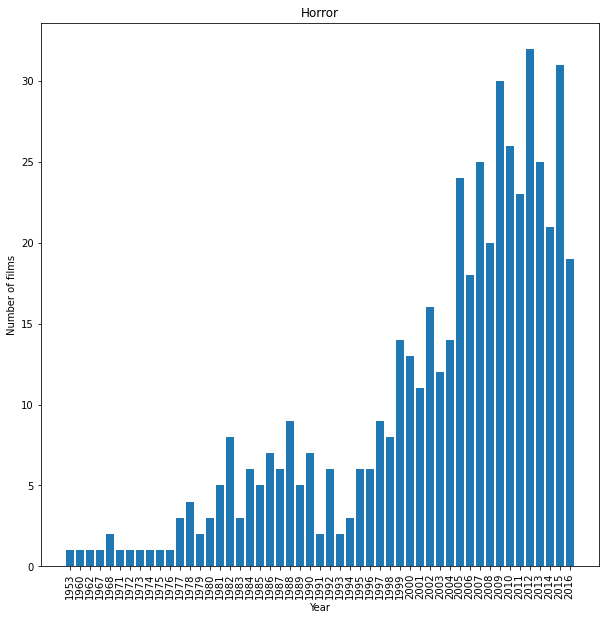

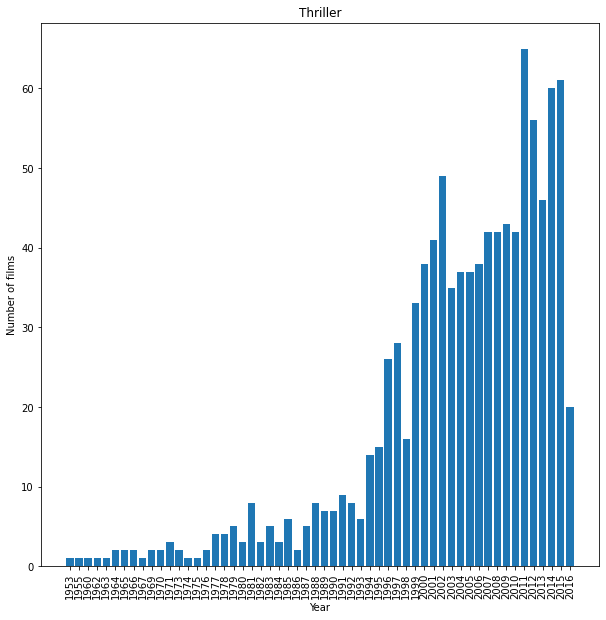

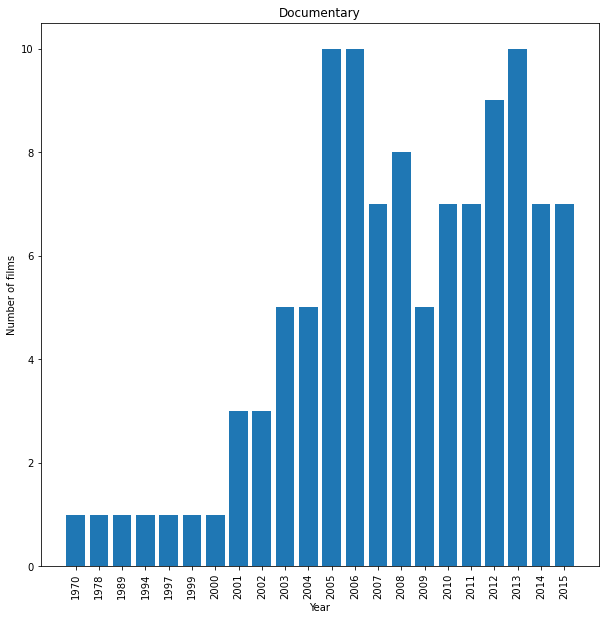

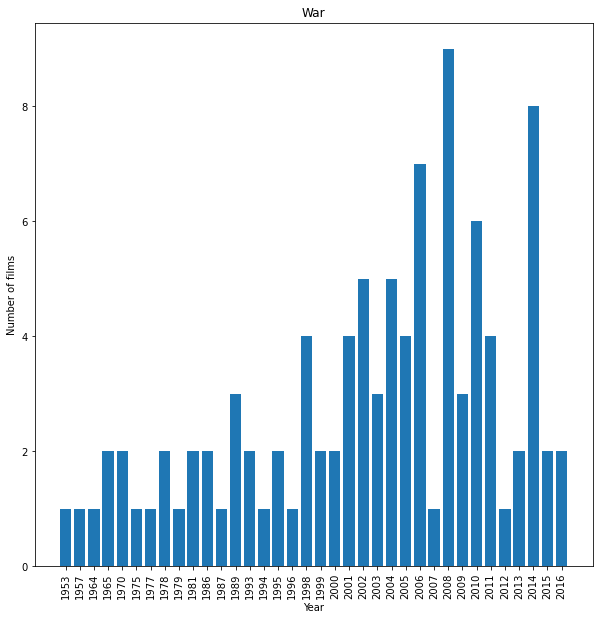

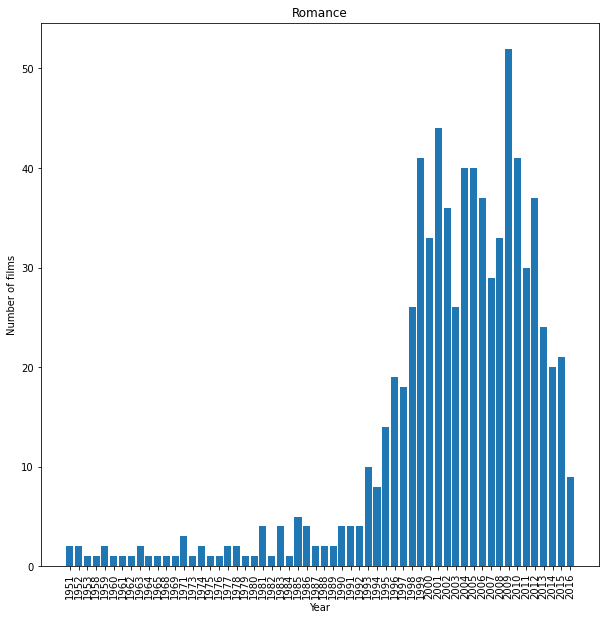

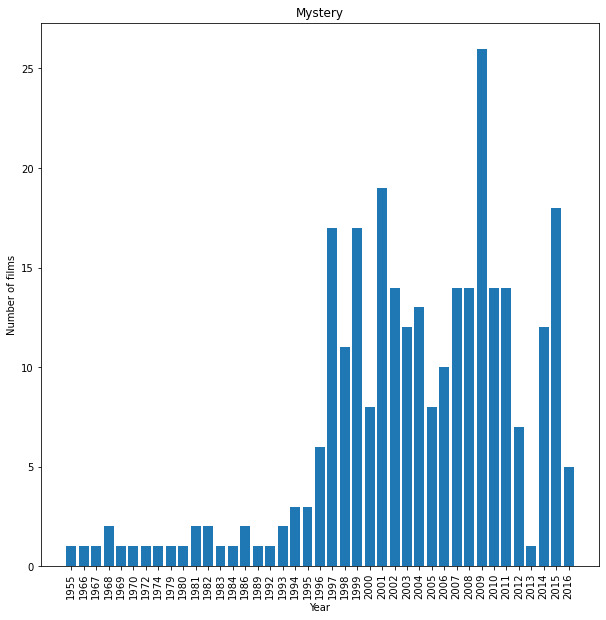

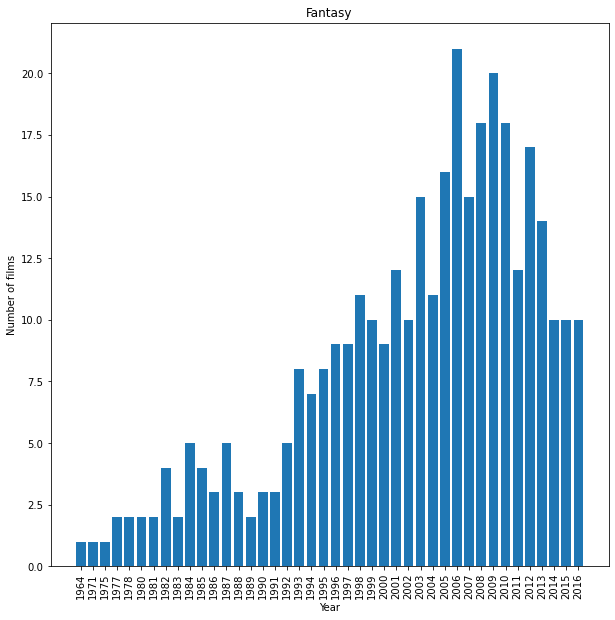

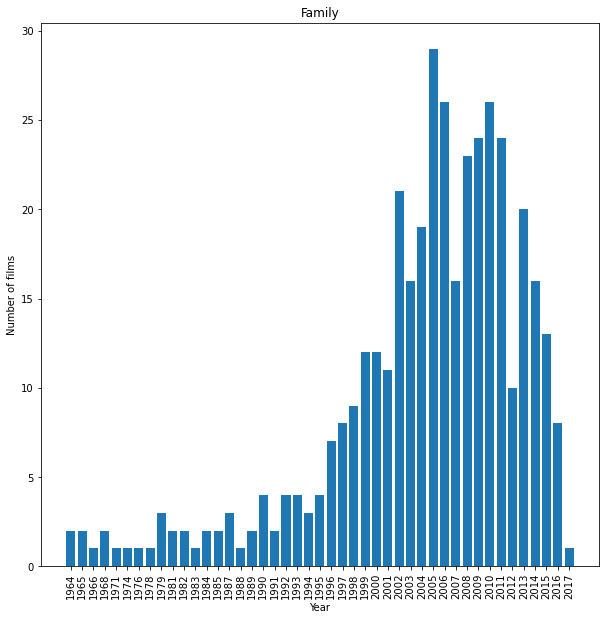

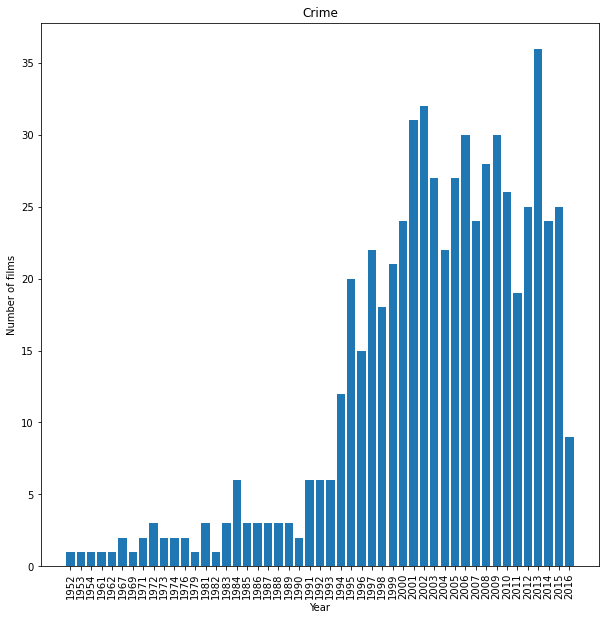

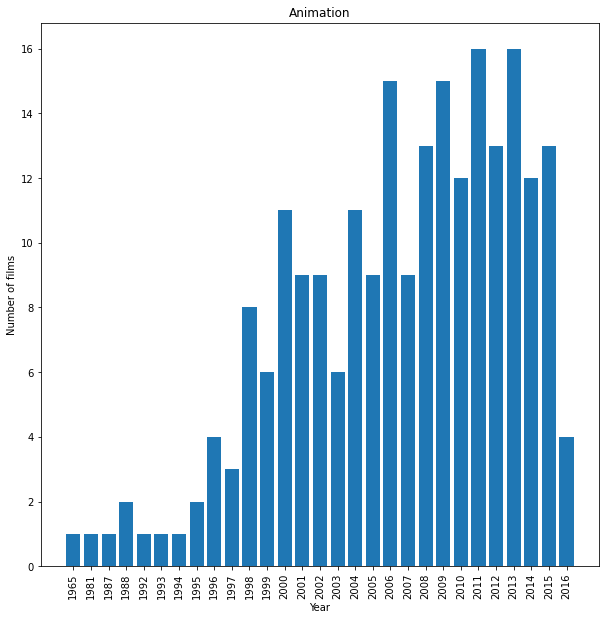

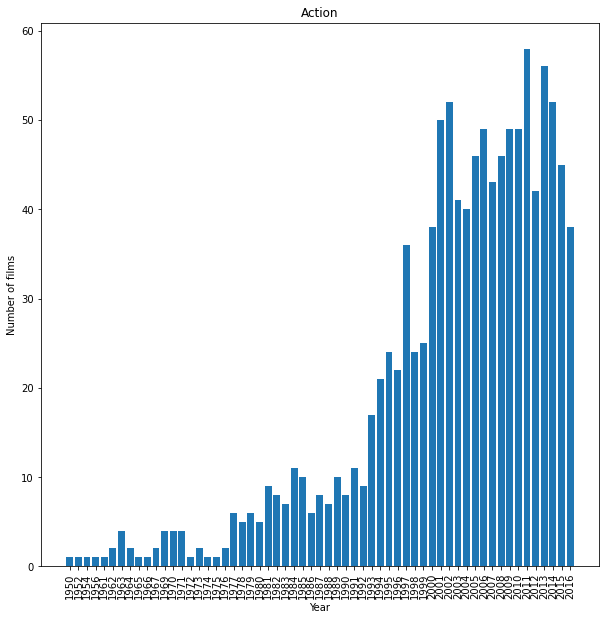

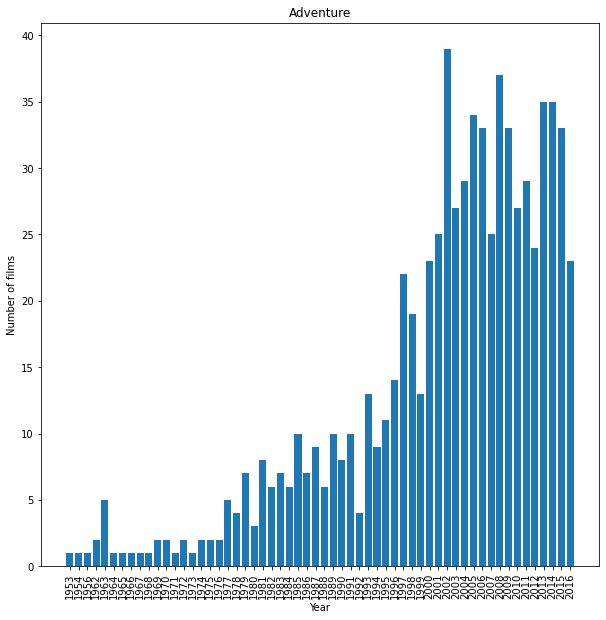

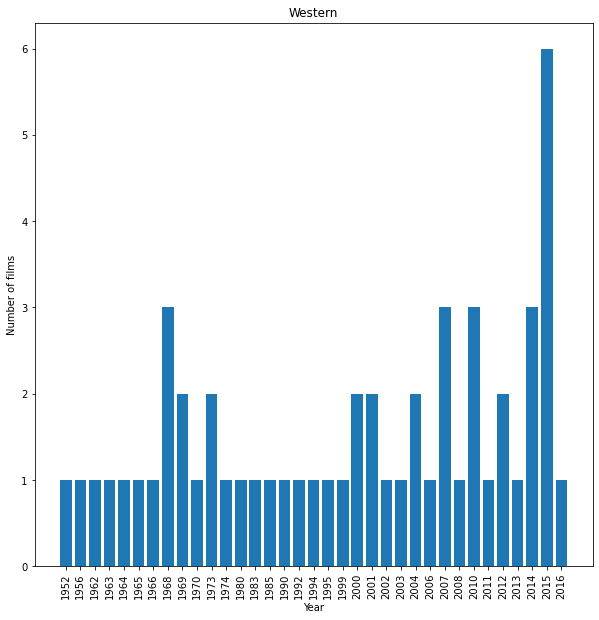

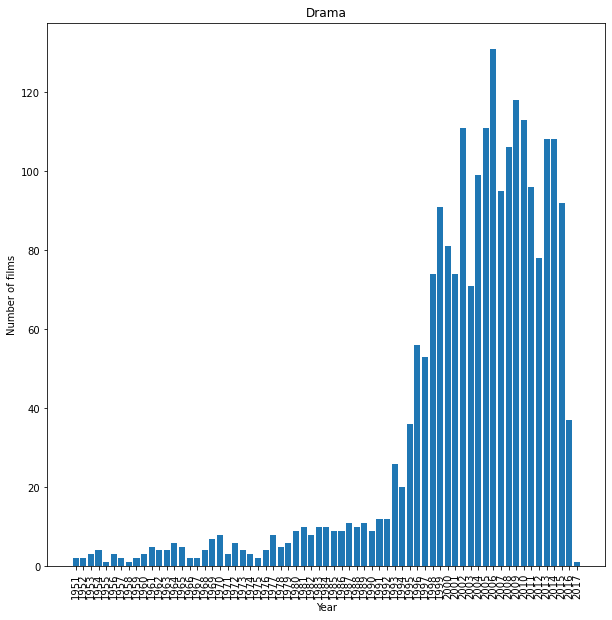

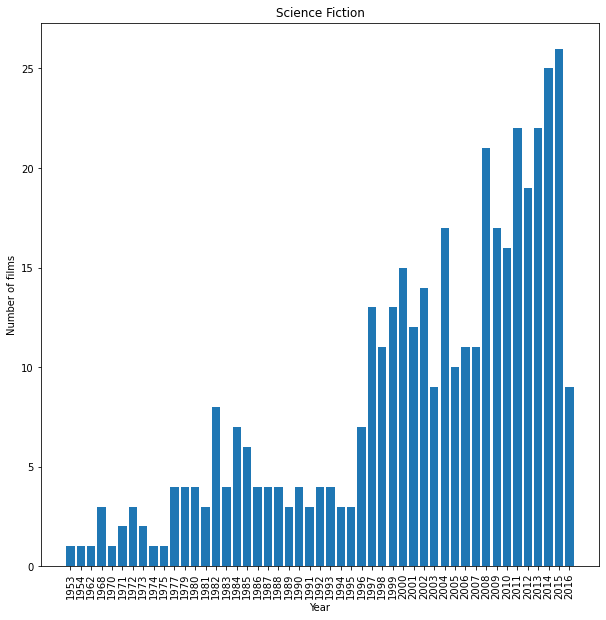

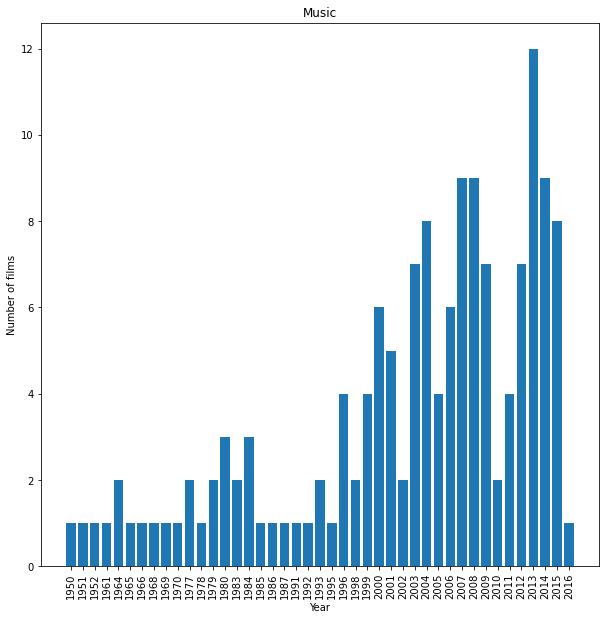

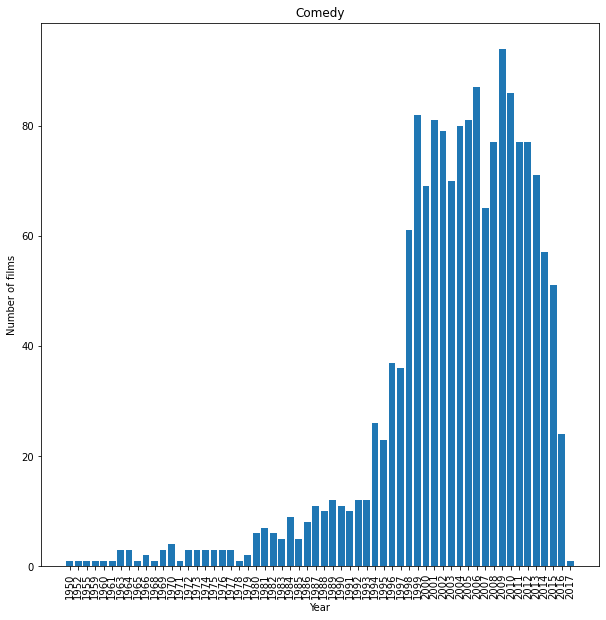

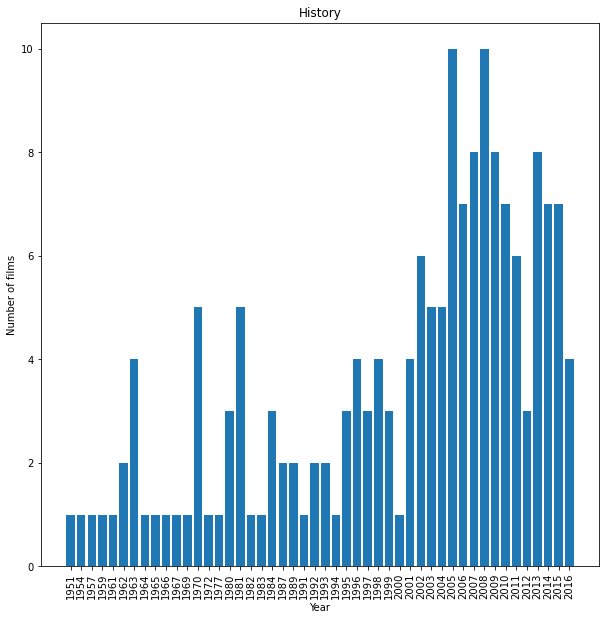

In [55]:
for gen in genre_set:
    years = []
    counts = []
    for year, stats in genres_per_year.items():
        for gen2, count in stats.items():
            if gen == gen2:
                counts.append(count)
                years.append(year)
    plt.figure(figsize=(10, 10))
    plt.bar(years, counts)
    plt.title(gen)
    plt.ylabel("Number of films")
    plt.xlabel("Year")
    plt.xticks(rotation=90)
    plt.show()

Immediately we see a problem with trying to analyse this: there are many more high-grossing films in 21st century than in the 20th century across all genres! With so many more movies being made in the last 20 years, we will get a heavily skewed view of which genres were most popular. We can't see when any genre peaked because this gives us the impression that they all peaked in the 2000s!

Also, there are too many years to look at. Since we want to know the trends for each decade, let's group the years into decades. Then, rather than look at how many films of each genre were made, let's try to find which was the most popular genre by plotting what proportion of all movies each genre made up in each decade. 

In [57]:
genres_per_decade = {} # Just like genres_per_year, but for decades
# Creating the year entries
genres_per_decade[1950] = {}
genres_per_decade[1960] = {}
genres_per_decade[1970] = {}
genres_per_decade[1980] = {}
genres_per_decade[1990] = {}
genres_per_decade[2000] = {}
genres_per_decade[2010] = {}
# Sum up the genre counts of each decade, store them in genres_per_decade
for year, data in genres_per_year.items():
    if year != 'nan':
        if int(year) >= 1950 and int(year) < 1960:
            for gen, count in data.items():
                if gen != "[" and gen != "]":
                    if gen in genres_per_decade[1950]:
                        if count != 'nan':
                            genres_per_decade[1950][gen] += count
                    else:
                        genres_per_decade[1950][gen] = count
        if int(year) >= 1960 and int(year) < 1970:
            for gen, count in data.items():
                if gen != "[" and gen != "]":
                    if gen in genres_per_decade[1960]:
                        if count != 'nan':
                            genres_per_decade[1960][gen] += count
                    else:
                        genres_per_decade[1960][gen] = count
        if int(year) >= 1970 and int(year) < 1980:
            for gen, count in data.items():
                if gen != "[" and gen != "]":
                    if gen in genres_per_decade[1970]:
                        if count != 'nan':
                            genres_per_decade[1970][gen] += count
                    else:
                        genres_per_decade[1970][gen] = count
        if int(year) >= 1980 and int(year) < 1990:
            for gen, count in data.items():
                if gen != "[" and gen != "]":
                    if gen in genres_per_decade[1980]:
                        if count != 'nan':
                            genres_per_decade[1980][gen] += count
                    else:
                        genres_per_decade[1980][gen] = count
        if int(year) >= 1990 and int(year) < 2000:
            for gen, count in data.items():
                if gen != "[" and gen != "]":
                    if gen in genres_per_decade[1990]:
                        if count != 'nan':
                            genres_per_decade[1990][gen] += count
                    else:
                        genres_per_decade[1990][gen] = count
        if int(year) >= 2000 and int(year) < 2010:
            for gen, count in data.items():
                if gen != "[" and gen != "]":
                    if gen in genres_per_decade[2000]:
                        if count != 'nan':
                            genres_per_decade[2000][gen] += count
                    else:
                        genres_per_decade[2000][gen] = count
        if int(year) >= 2010 and int(year) < 2020:
            for gen, count in data.items():
                if gen != "[" and gen != "]":
                    if gen in genres_per_decade[2010]:
                        if count != 'nan':
                            genres_per_decade[2010][gen] += count
                    else:
                        genres_per_decade[2010][gen] = count


genre_proportions = {} # Dict of dicts that stores the proportion of each genre
genre_proportions[1950] = {}
genre_proportions[1960] = {}
genre_proportions[1970] = {}
genre_proportions[1980] = {}
genre_proportions[1990] = {}
genre_proportions[2000] = {}
genre_proportions[2010] = {}
# Find the total number of movies each decade, then divide the number of movies per genre by that per decade to get proportions
for dec, data in genres_per_decade.items():
    total = 0
    for gen, count in data.items():
        if gen != "[" and gen != "]":
            total += count
    for gen, count in data.items():
        if gen != "[" and gen != "]":
            genre_proportions[dec][gen] = round(count/total,2)

We have filled the genres_per_decade and genre_proportions dictionaries. We can now plot the data. Each of the following graphs is a bar graph that shows for each genre what proportion of the movies in a given decade the genre made up.

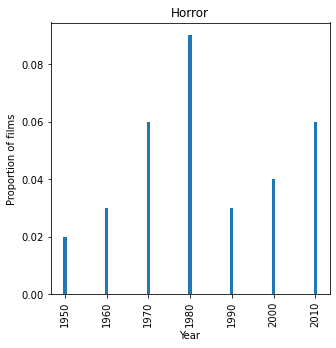

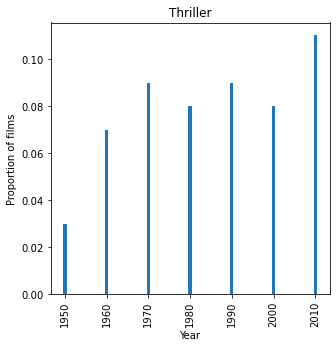

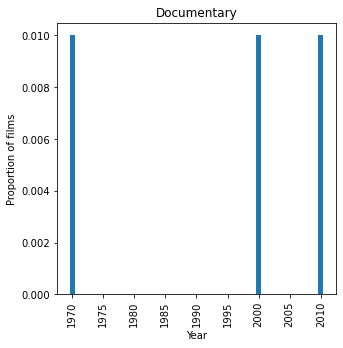

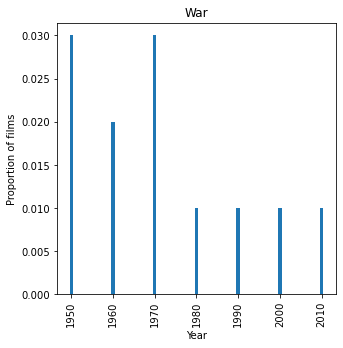

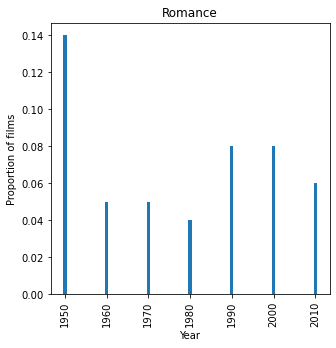

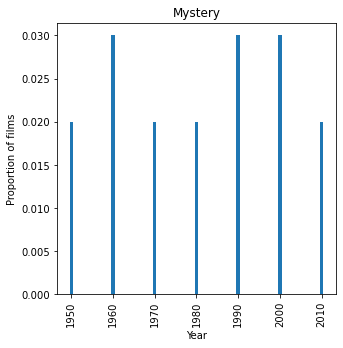

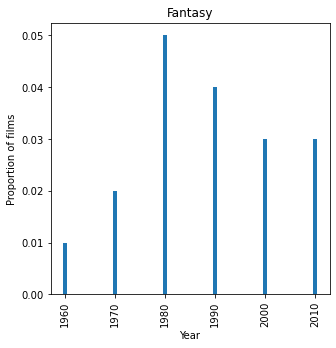

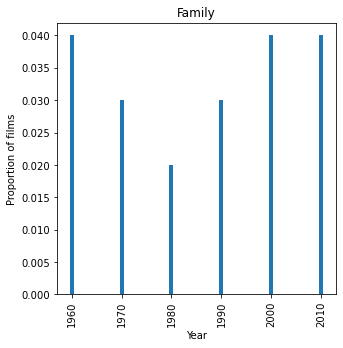

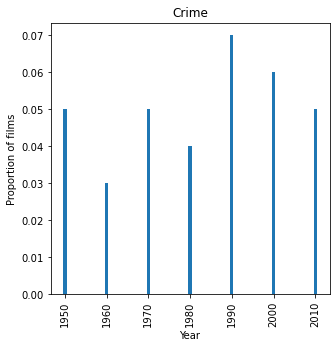

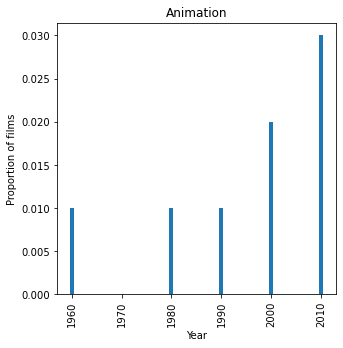

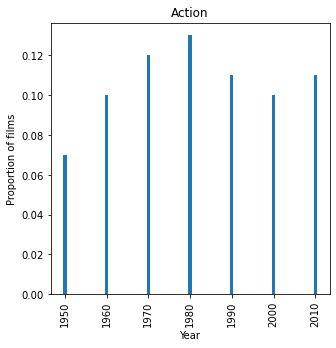

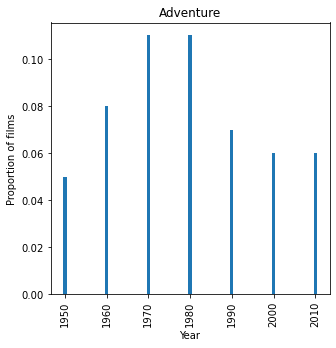

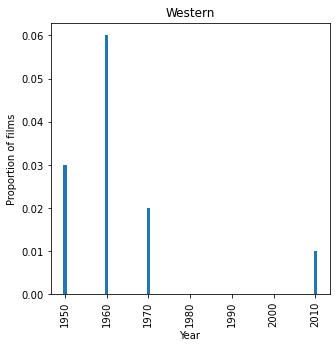

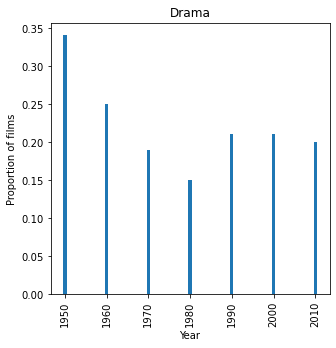

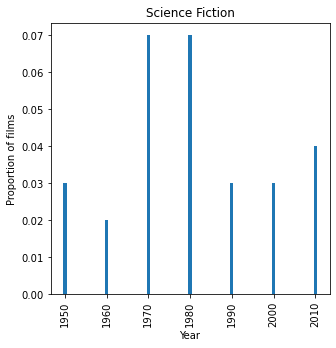

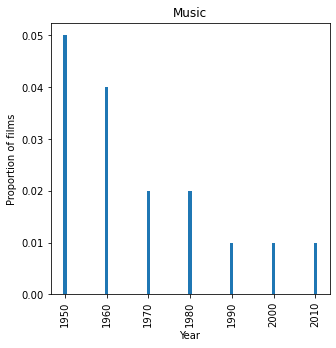

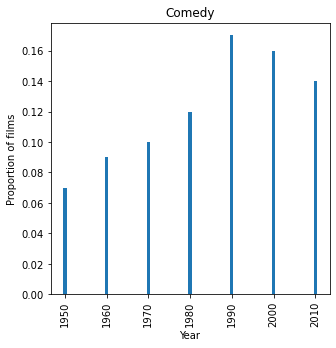

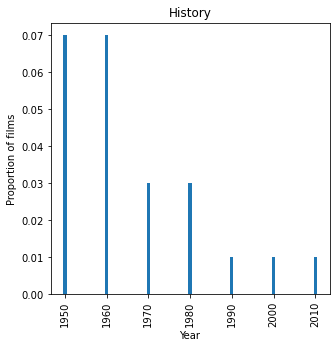

In [59]:
for gen in genre_set:
    decs = []
    props = []
    for dec, stats in genre_proportions.items():
        for gen2, count in stats.items():
            if gen == gen2:
                props.append(count)
                decs.append(dec)
    plt.figure(figsize=(5, 5))
    plt.bar(decs, props)
    plt.title(gen)
    plt.ylabel("Proportion of films")
    plt.xlabel("Year")
    plt.xticks(rotation=90)
    plt.show()

This gives us a better picture of which genres the highest grossing movies of each decade consisted of. Horror movies made up over 8% of movies in the 1980s. Thriller movies made up 9% of movies in the 1970s and 11% of movies in the 2010s. Documentaries historically were not high grossing, but in the 1970s, 2000s, and 2010s they made up 1% of movies in the TMDb dataset. War movies made up their largest proportions in the 1950s and 1970s: 3%. Romance movies were especially common in the 1950s. Out of the few movies making the TMDb 5000 movies list, Romance made up 14%! Mystery films made up similar proportions of movies in the 1960s, 1990s, and 200s: 3%. 5% of highest grossing movies in the 1980s were fantasy movies. Family movies made up 4% of movies in the 1960s, 2000s, and 2010s. Crime movies were very common in the 1990s, making up 7% of movies! Animated movies, probably due to advances in CGI, became more common in the 2000s, and in the 2010s they made up 3% of movies released. Action movies have always made up a large portion of movies, but of the highest grossing films, they made up their largest proportion in the 1980s at 13%, though they consistently stay at 10% throughout the decades. Adventure movies seem to have peaked in the 70s and 80s, making up 11% of all high-grossing movies in those decades. The peak for Western movies is clear: they made up 6% of the movies in the 1960s! It hasn't gotten nearly that high ever since. Dramas seem to be the winners almost every decade. In the 1950s they made up 34% of the highest-grossing films, but throughout history they have rarely made up less than 20%. Science Fiction movies were most common in the 1970s and 1980s, when they made up 7% of the movies. Musicals made up 5% in the 50s and 4% in the 60s, but haven't gone above 1% in the last few decades. Comedy films made up large proportions of the films ever since the 1950s when they were at 7%, but they were at their highest in the 1990s, making up 17% of films! Lastly, History films have not been quite common amongst highest-grossing movies sin the last few decades, but in the 50s and 60s they made up 7% of movies!

I would like to reiterate that, when I say a genre made up a certain percentage of movies, I mean that they made up a certain percentage of movies in the TMDb highest-grossing movies list that were made in that decade.

So now we know which genres of highest-grossing movies were most common in each decade, but we don't necessarily know which ones were the most _popular_. While making up a large proportion of the movies released may be an indicator of a genres popularity, this is not the only thing we should look at. Let's look at one more thing: for each decade, let's see the top 10 highest-grossing movies (we'll sort by net revenue) of each decade and see what genres they are from. Let's add another column to movie_data: net earnings.

In [101]:
earnings_list = []
for index, row in movie_data.iterrows():
    earnings_list.append(row['revenue'] - row['budget'])
    
movie_data = movie_data.assign(net_earnings = earnings_list)
movie_data.head()

,title,release_date,genres,popularity,vote_average,budget,revenue,net_earnings
3816,Annie Get Your Gun,1950-05-17,"[Action, Comedy, Music]",1.726175,7.3,3768785,8000000,4231215
4046,Show Boat,1951-07-13,"[Music, Romance]",1.606314,6.9,2300000,11000000,8700000
4172,A Streetcar Named Desire,1951-09-18,[Drama],14.884756,7.6,1800000,8000000,6200000
3229,Quo Vadis,1951-11-08,"[Drama, History, Romance]",7.973109,7.0,8250000,30000000,21750000
3740,The Greatest Show on Earth,1952-01-10,"[Action, Drama, Romance]",8.988455,6.6,4000000,36000000,32000000


#TODO get the top 10 for each decade. Put in list, get top 10. Show pretty graphs.

Just for fun, let's see if the top grossing movie of each year is from the most popular genres of the decade:

In [78]:
top_genre = {} # Dict that we'll use to make the dataframe of the genres of the top movie of each year
for index, row in top_movies.iterrows():
    mov = row['No. 1 Movie']
    for i, r in movie_data.iterrows():
        if r['title'] == mov or r['title'] == mov[:-1]:
            yr = row['Year']
            top_genre[yr] = r['genres']

year_genres = pd.DataFrame(top_genre.items(), columns=["Year", "Genres"]) # Turn the top_genre dict into a dataframe
print(year_genres)

    Year                                 Genres
0   1950             [Romance, Fantasy, Family]
1   1951              [Drama, History, Romance]
2   1952               [Action, Drama, Romance]
3   1957                  [Drama, History, War]
4   1959                                [Drama]
5   1962            [Adventure, Drama, History]
6   1963              [Drama, History, Romance]
7   1964          [Adventure, Action, Thriller]
8   1965                 [Drama, Family, Music]
9   1967             [Family, Adventure, Drama]
10  1968  [Science Fiction, Mystery, Adventure]
11  1969              [History, Drama, Western]
12  1971          [Adventure, Action, Thriller]
13  1972                         [Drama, Crime]
14  1973              [Drama, Horror, Thriller]
15  1975          [Horror, Thriller, Adventure]
16  1976                                [Drama]
17  1978                              [Romance]
18  1979          [Action, Adventure, Thriller]
19  1981                    [Adventure, 